In [ ]:
import tensorflow as tf
import base64
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
tf.keras.backend.set_floatx('float32')

In [ ]:
df = pd.read_csv("./spotify_songs.csv")[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "track_popularity"]]
df.head(3)

X = df.loc[:, df.columns != "track_popularity"]
y = df.loc[:, "track_popularity"]

def put_in_range(value):
  return max(0.0, min(value, 1.0))

X["loudness"] = ((X["loudness"] + 60) / 60).apply(put_in_range)
X["tempo"] = (X["tempo"] / 200).apply(put_in_range)

X.describe()

<ipython-input-4-7de0074b5eb8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["loudness"] = ((X["loudness"] + 60) / 60).apply(put_in_range)
<ipython-input-4-7de0074b5eb8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["tempo"] = (X["tempo"] / 200).apply(put_in_range)


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,0.157475,0.644275,0.713973,0.061845,0.179012,0.896829,0.075251,0.607016,0.512036
std,0.204095,0.127728,0.164508,0.187949,0.137612,0.042616,0.067746,0.119924,0.219362
min,0.000002,0.098500,0.008140,0.000000,0.015800,0.577317,0.022800,0.177385,0.027600
25%,0.016900,0.568000,0.613000,0.000000,0.092800,0.877850,0.037300,0.520543,0.347000
50%,0.073000,0.657000,0.736000,0.000007,0.126000,0.904183,0.049900,0.604967,0.505000
75%,0.212000,0.734000,0.837000,0.001880,0.226000,0.925671,0.080900,0.650267,0.678000
max,0.983000,0.979000,0.999000,0.982000,0.988000,0.988333,0.558000,1.000000,0.981000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(X_train)

Epoch 1/500
109/109 [==============================] - 2s 6ms/step - loss: 2865.3386 - mean_absolute_error: 47.3871
Epoch 2/500
109/109 [==============================] - 1s 5ms/step - loss: 1664.1887 - mean_absolute_error: 35.0610
Epoch 3/500
109/109 [==============================] - 1s 5ms/step - loss: 679.2728 - mean_absolute_error: 22.0976
Epoch 4/500
109/109 [==============================] - 1s 5ms/step - loss: 669.0017 - mean_absolute_error: 21.6852
Epoch 5/500
109/109 [==============================] - 0s 4ms/step - loss: 657.4324 - mean_absolute_error: 21.5029
Epoch 6/500
109/109 [==============================] - 0s 3ms/step - loss: 642.4172 - mean_absolute_error: 21.2867
Epoch 7/500
109/109 [==============================] - 0s 4ms/step - loss: 643.2273 - mean_absolute_error: 21.3235
Epoch 8/500
109/109 [==============================] - 0s 3ms/step - loss: 645.2784 - mean_absolute_error: 21.3468
Epoch 9/500
109/109 [==============================] - 0s 4ms/step - loss: 638

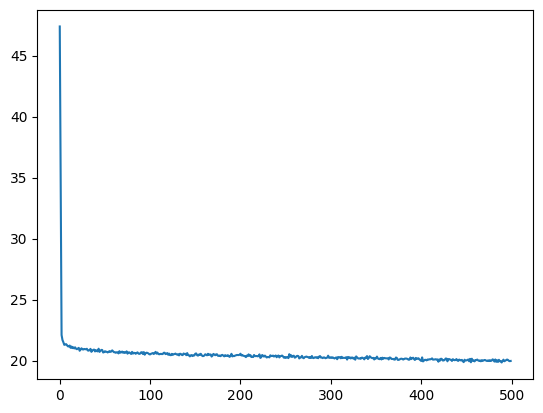

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.AdamW(0.0001, weight_decay=0.04), metrics=["mean_absolute_error"])

history = model.fit(X_train, y_train, epochs=500)

# log_reg = LogisticRegression(random_state=42, max_iter=100)
# log_reg.fit(X_train, y_train)

In [ ]:
# y_pred = log_reg.predict(X_test)
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_absolute_error(y_test, y_pred))

NameError: ignored

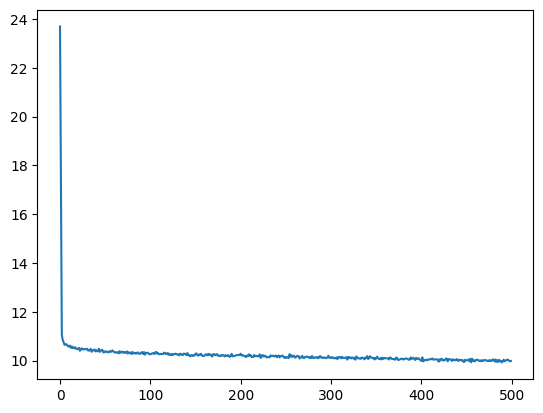

In [ ]:
plt.plot([x / 2.0 for x in history.history['mean_absolute_error']])
plt.show()

1/1 [==============================] - 0s 22ms/step


array([[37.77567]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_57 (Dense)            (None, 128)               1280      
                                                                 
 dense_58 (Dense)            (None, 128)               16512     
                                                                 
 dense_59 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17940 (70.08 KB)
Trainable params: 17921 (70.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [ ]:
# Plot outputs
plt.scatter(X_test["valence"], y_test, color="black")

plt.xticks(())
plt.yticks(())

plt.show()